
# **Generative models - MAP estimation**
 
**MAP estimation of Gaussian parameters**<br>
Dr. Jean-Marc Odobez and Dr. Michael Villamizar<br>
Idiap Research Institute<br>
2019


This laboratory notebook focuses on Maximum A Posteriori (MAP) estimation versus Maximum Likelihood estimation, applied to the Gaussian case.

In [1]:
# Import libraries.
from __future__ import print_function
import sys
import numpy as np
import matplotlib.pyplot as plt

# Own libraries.
import utils as utils

## **1. Generate data and visualization**

The next function generates a Gaussian distribution which is our data.

In [2]:
# Generate data.
def generate_data(N=100, d=2):
    """This function creates a Gaussian distribution.
    
    Parameters:
    + N (int): Number of points/samples (Default: 100)
    + d (int): Data dimension (Default: 2)
    
    Returns:
    + X (Numpy ndarray): Nxd array containing the data
        points.
    """
    
    # Mean and covariance -fixed-.
    CovData = np.eye(2)*4  # Gaussian covariance.
    CovData[0,1]=1
    CovData[1,0]=1
    CovData[1,1]=16
    CovData[0,0]=4
    MeanData = np.array([[3, 3]]).T  # Gaussain mean.
    
    # Generate data.
    X = utils.gen_gaussian_data(N, d, MeanData, CovData)
    
    return X

Run the next cell to generate the data -Gaussian distribution-.

In [3]:
# Parameters.
N = 100  # Number of points.
d = 2  # Dimension -fixed-.

# Generate data.
X = generate_data(N, d)

# Message.
print('Data:')
print('+  Num. points: {0}'.format(X.shape[0]))
print('+  Dimension: {0}'.format(X.shape[1]))
print('+  Data format', X.shape)

Data:
+  Num. points: 100
+  Dimension: 2
+  Data format (100, 2)


The next code displays the data points (red points). 

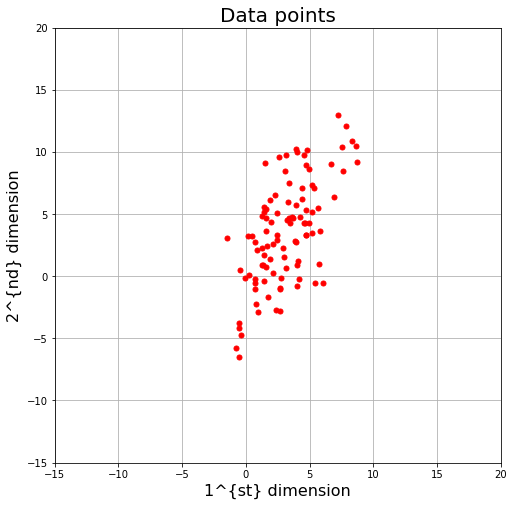

In [4]:
# Show data points.
utils.show_data(X)

## **2. Given Functions**
Below are some given the functions.

In [5]:
# Wishart parameters.
# The function returns the set of parameters defining the 
# Normal-Inverse Wishart distribution. Note that it also 
# computed the expected covariance under this prior, which 
# can be used for visualization.
def wishart_param(N, d):

    # Mean prior (m).
    prior = np.array([[-12, 5]]).T

    # Tau: Control the balance between the prior mean and 
    # the estimated mean.
    tau = 100
    # v.
    nu = 100
    # V 
    V = nu*30*np.eye(2)
    
    # Sigma prior (not a parameter): as expectation from 
    # the inverse Wishart distribution.
    sigmaprior = 1./(nu-d-1)*V

    # Parameters.
    param = {'m':prior, 'nu':nu, 'tau':tau, 'sigmaprior':sigmaprior, 'V':V}

    return param

Below we show how to us a function helpful to visualize: 
- the data
- the prior expected mean and covariance of a wishart distribution (wpara)
- the mean and covariance of two other distributions

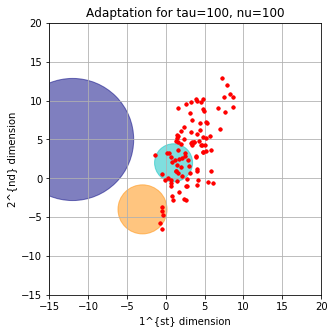

In [6]:
# Wishart parameters.
paraw=wishart_param(N,d) 
    
# Some fake means and covariance.
m1 = np.array([[1,2]]).T
m2 = np.array([[-3,-4]]).T
cov1 = 3*np.eye(2)
cov2 = 5*np.eye(2)
    
# Show results.
utils.show_results(X, paraw, m1, cov1, \
                   m2, cov2)

## **3. Functions to fill**
Below are given the functions that must be completed.

In [7]:
# ML for Gaussian parameter.
def ml_gauss_param(X):
    # Perform the Maximum Likelihood adaptation of Gaussian parameter.
    # Input: X: data points.
    # Output: mu,sigma: estimated Gaussian parameters.
    
    # These are dummy values, to test the functionality.
    mu=np.array([[1,2]]).T
    sigma=3*np.eye(2)
    
    # Compute below the correct values
    # mu = ...
    # sigma = ...
    mu = np.expand_dims(np.mean(X, axis=0), axis=1)
    sigma = np.cov(X.T)
    
    return mu, sigma

# MAP adaptation.
def map_gauss_param(X, wparam):
    # Perform the MAP adaptation of Gaussian parameter using Wishart prior.
    # Input: X: data points.
    #        wparam: structure containing the Wishart parameters.
    # Output: mu, sigma: estimated Gaussian parameters.
    
    # These are dummy values, to test the functionality.
    mu=np.array([[-3,-4]]).T
    sigma=5*np.eye(2)
    
    # Compute below the correct values.
    m = wparam['m']
    V = wparam['V']
    nu = wparam['nu']
    tau = wparam['tau']
    N, d = np.shape(X)
    # mu = ...
    # sigma = ...
    mu = np.expand_dims(np.mean(X,axis=0),axis=1)
    S = np.cov(X.T)
    mu = (tau*m + N*mu)/(tau+N)
    sigma = (V + N*S + N*tau/(N+tau)*(m-mu)*(m-mu).T)/(nu - d + N)
    
    return mu, sigma

## **3. Question (c) and (d) : studying the effect of the $\tau$ value**

For tau=5:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [2.420, 3.638]


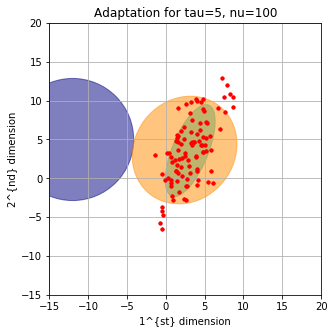

For tau=10:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [1.764, 3.700]


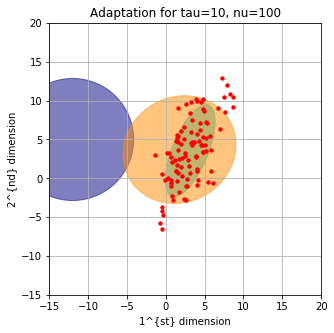

For tau=50:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-1.906, 4.047]


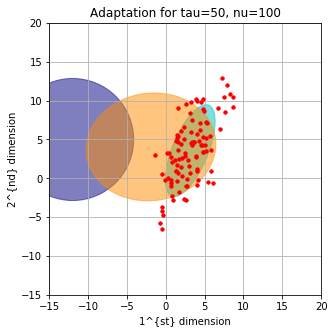

For tau=100:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-4.430, 4.285]


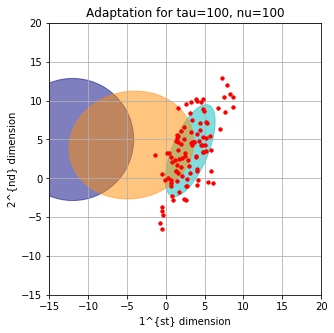

For tau=1000:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-10.624, 4.870]


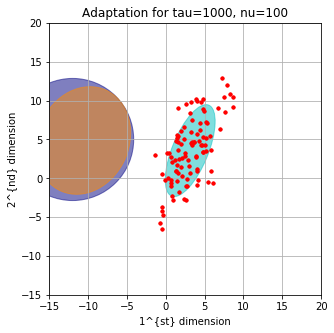

In [8]:
# Parameters.
tau_vec = [5,10,50,100,1000]

# Wishart parameters.
param = wishart_param(N, d)

# Loop for different tau values.
for tau in tau_vec:

    # Update tau in Wishart parameters.
    param['tau'] = tau;

    # MAP/ML estimation.
    mu_ml, sigma_ml = ml_gauss_param(X)
    mu_map, sigma_map = map_gauss_param(X, param)

    # Message.
    print('For tau={}:'.format(param['tau']))
    print('  Prior mean: [{0:.3f}, {1:.3f}]'.\
          format(param['m'][0,0],param['m'][1,0]))
    print('  ML mean: [{0:.3f}, {1:.3f}]'.\
          format(mu_ml[0,0],mu_ml[1,0]))
    print('  MAP mean: [{0:.3f}, {1:.3f}]'.\
          format(mu_map[0,0],mu_map[1,0]))
    
    # Show results.
    utils.show_results(X, param, mu_ml, sigma_ml, \
                       mu_map, sigma_map)   

## **5. Question (e) : effect of  the $\nu$ value**

For tau=100, nu=5:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-4.430, 4.285]


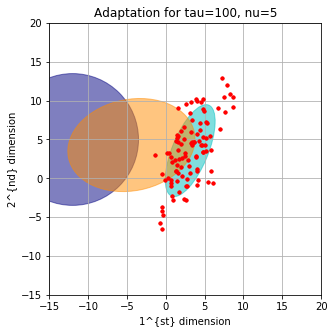

For tau=100, nu=50:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-4.430, 4.285]


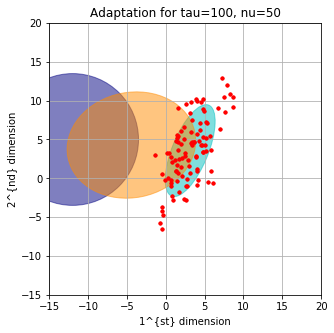

For tau=100, nu=100:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-4.430, 4.285]


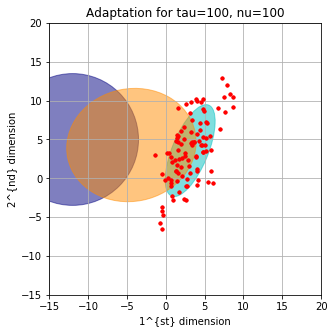

For tau=100, nu=1000:
  Prior mean: [-12.000, 5.000]
  ML mean: [3.141, 3.570]
  MAP mean: [-4.430, 4.285]


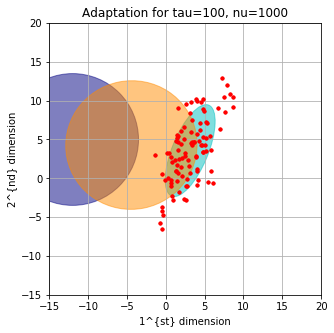

In [9]:
# Parameters.
nu_vec = [5,50,100,1000]

# Reset tau.
param['tau'] = 100

# Define an expected covariance matrix which makes 
# sense (e.g. with a standard deviation of 6).
SigE=36*np.eye(2)

# Loop for different nu values.
for nu in nu_vec:

    # Update parameters nu.
    param['nu'] = nu
    
    # Update V value making sense according to the prior 
    # we want to set on the covariance.
    Vu =SigE*(nu-2-1)
    param['V']=Vu
    param['sigmaprior']=SigE

    # MAP/ML estimation.
    mu_ml, sigma_ml = ml_gauss_param(X)
    mu_map, sigma_map = map_gauss_param(X, param)

    # Message.
    print('For tau={}, nu={}:'.format(param['tau'],param['nu']))
    print('  Prior mean: [{0:.3f}, {1:.3f}]'.\
          format(param['m'][0,0],param['m'][1,0]))
    print('  ML mean: [{0:.3f}, {1:.3f}]'.\
          format(mu_ml[0,0],mu_ml[1,0]))
    print('  MAP mean: [{0:.3f}, {1:.3f}]'.\
          format(mu_map[0,0],mu_map[1,0]))
    
    # Show results.
    utils.show_results(X, param, mu_ml, sigma_ml, \
                       mu_map, sigma_map)   